# 100 pandas puzzles

Inspired by [100 Numpy exerises](https://github.com/rougier/numpy-100), here are 100* short puzzles for testing your knowledge of [pandas'](http://pandas.pydata.org/) power.

Since pandas is a large library with many different specialist features and functions, these excercises focus mainly on the fundamentals of manipulating data (indexing, grouping, aggregating, cleaning), making use of the core DataFrame and Series objects. 

Many of the excerises here are stright-forward in that the solutions require no more than a few lines of code (in pandas or NumPy... don't go using pure Python or Cython!). Choosing the right methods and following best practices is the underlying goal.

The exercises are loosely divided in sections. Each section has a difficulty rating; these ratings are subjective, of course, but should be a seen as a rough guide as to how inventive the required solution is.

If you're just starting out with pandas and you are looking for some other resources, the official documentation  is very extensive. In particular, some good places get a broader overview of pandas are...

- [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)
- [pandas basics](http://pandas.pydata.org/pandas-docs/stable/basics.html)
- [tutorials](http://pandas.pydata.org/pandas-docs/stable/tutorials.html)
- [cookbook and idioms](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#cookbook)

Enjoy the puzzles!

\* *the list of exercises is not yet complete! Pull requests or suggestions for additional exercises, corrections and improvements are welcomed.*

## Importing pandas

### Getting started and checking your pandas setup

Difficulty: *easy* 

**1.** Import pandas under the name `pd`.

In [1]:
import pandas as pd

**2.** Print the version of pandas that has been imported.

In [2]:
pd.__version__

'2.0.3'

**3.** Print out all the version information of the libraries that are required by the pandas library.

In [3]:
pd.show_versions(as_json=False)


INSTALLED VERSIONS
------------------
commit           : 0f437949513225922d851e9581723d82120684a6
python           : 3.11.4.final.0
python-bits      : 64
OS               : Linux
OS-release       : 6.2.0-31-generic
Version          : #31~22.04.1-Ubuntu SMP PREEMPT_DYNAMIC Wed Aug 16 13:45:26 UTC 2
machine          : x86_64
processor        : x86_64
byteorder        : little
LC_ALL           : None
LANG             : en_US.UTF-8
LOCALE           : en_US.UTF-8

pandas           : 2.0.3
numpy            : 1.25.2
pytz             : 2023.3
dateutil         : 2.8.2
setuptools       : 65.5.0
pip              : 23.1.2
Cython           : None
pytest           : None
hypothesis       : None
sphinx           : None
blosc            : None
feather          : None
xlsxwriter       : None
lxml.etree       : None
html5lib         : None
pymysql          : None
psycopg2         : None
jinja2           : 3.1.2
IPython          : 8.14.0
pandas_datareader: None
bs4              : 4.12.2
bottleneck      

/home/szymonkepinski/internship-ds-ml/pandas_excercise/venv/lib/python3.11/site-packages/_distutils_hack/__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## DataFrame basics

### A few of the fundamental routines for selecting, sorting, adding and aggregating data in DataFrames

Difficulty: *easy*

Note: remember to import numpy using:
```python
import numpy as np
```

Consider the following Python dictionary `data` and Python list `labels`:

``` python
data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']
```
(This is just some meaningless data I made up with the theme of animals and trips to a vet.)

**4.** Create a DataFrame `df` from this dictionary `data` which has the index `labels`.

In [4]:
import numpy as np

data = {'animal': ['cat', 'cat', 'snake', 'dog', 'dog', 'cat', 'snake', 'cat', 'dog', 'dog'],
        'age': [2.5, 3, 0.5, np.nan, 5, 2, 4.5, np.nan, 7, 3],
        'visits': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'priority': ['yes', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df = pd.DataFrame(data, labels)


**5.** Display a summary of the basic information about this DataFrame and its data.

In [5]:
df

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no
d,dog,NaN,3,yes
e,dog,5.0,2,no
f,cat,2.0,3,no
g,snake,4.5,1,no
h,cat,NaN,1,yes
i,dog,7.0,2,no
j,dog,3.0,1,no


**6.** Return the first 3 rows of the DataFrame `df`.

In [6]:
df.head(3)

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
c,snake,0.5,2,no


**7.** Select just the 'animal' and 'age' columns from the DataFrame `df`.

In [7]:
df[['animal', 'age']]

,animal,age
a,cat,2.5
b,cat,3.0
c,snake,0.5
d,dog,NaN
e,dog,5.0
f,cat,2.0
g,snake,4.5
h,cat,NaN
i,dog,7.0
j,dog,3.0


**8.** Select the data in rows `[3, 4, 8]` *and* in columns `['animal', 'age']`.

In [8]:
df.iloc[[3, 4, 8], [df.columns.get_loc(c) for c in ['animal', 'age']]]

,animal,age
d,dog,NaN
e,dog,5.0
i,dog,7.0


**9.** Select only the rows where the number of visits is greater than 3.

In [9]:
df[df["visits"] > 3]

,animal,age,visits,priority


**10.** Select the rows where the age is missing, i.e. is `NaN`.

In [10]:
df[pd.isna(df["age"])]

,animal,age,visits,priority
d,dog,NaN,3,yes
h,cat,NaN,1,yes


**11.** Select the rows where the animal is a cat *and* the age is less than 3.

In [11]:
df[(df["animal"] == "cat") & (df["age"] < 3)]

,animal,age,visits,priority
a,cat,2.5,1,yes
f,cat,2.0,3,no


**12.** Select the rows the age is between 2 and 4 (inclusive).

In [12]:
df[df['age'].between(2, 4, inclusive='both')]

,animal,age,visits,priority
a,cat,2.5,1,yes
b,cat,3.0,3,yes
f,cat,2.0,3,no
j,dog,3.0,1,no


**13.** Change the age in row 'f' to 1.5.

In [13]:
df.loc["f", "age"] = 1.5

**14.** Calculate the sum of all visits (the total number of visits).

In [14]:
df["visits"].sum()

19

**15.** Calculate the mean age for each different animal in `df`.

In [15]:
df.groupby("animal").agg({"age": "mean"}).rename(columns={"age": "mean_age"})

,mean_age
animal,
cat,2.333333
dog,5.000000
snake,2.500000


**16.** Append a new row 'k' to `df` with your choice of values for each column. Then delete that row to return the original DataFrame.

In [16]:
new_row = pd.Series({'animal': 'rabbit', 'age': 1.5, 'visits': 2, 'priority': 'no'}, name='k')
df = pd.concat([df, new_row.to_frame().T])
df = df.drop("k")

**17.** Count the number of each type of animal in `df`.

In [17]:
df.groupby("animal").size().to_frame(name="count")

,count
animal,
cat,4
dog,4
snake,2


**18.** Sort `df` first by the values in the 'age' in *decending* order, then by the value in the 'visit' column in *ascending* order.

In [18]:
df.sort_values(by=["age", "visits"], ascending=[False, True])

,animal,age,visits,priority
i,dog,7.0,2,no
e,dog,5.0,2,no
g,snake,4.5,1,no
j,dog,3.0,1,no
b,cat,3.0,3,yes
a,cat,2.5,1,yes
f,cat,1.5,3,no
c,snake,0.5,2,no
h,cat,NaN,1,yes
d,dog,NaN,3,yes


**19.** The 'priority' column contains the values 'yes' and 'no'. Replace this column with a column of boolean values: 'yes' should be `True` and 'no' should be `False`.

In [19]:
df["priority"] = df["priority"].replace({"yes": True, "no": False})

**20.** In the 'animal' column, change the 'snake' entries to 'python'.

In [20]:
df.loc[df["animal"] == "snake", "animal"] = "python"

**21.** For each animal type and each number of visits, find the mean age. In other words, each row is an animal, each column is a number of visits and the values are the mean ages (hint: use a pivot table).

In [21]:
df.pivot_table(index="animal", columns=["visits"], values="age", aggfunc="mean")

visits,1,2,3
animal,,,
cat,2.5,NaN,2.25
dog,3.0,6.0,NaN
python,4.5,0.5,NaN


## DataFrames: beyond the basics

### Slightly trickier: you may need to combine two or more methods to get the right answer

Difficulty: *medium*

The previous section was tour through some basic but essential DataFrame operations. Below are some ways that you might need to cut your data, but for which there is no single "out of the box" method.

**22.** You have a DataFrame `df` with a column 'A' of integers. For example:
```python
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
```

How do you filter out rows which contain the same integer as the row immediately above?

In [22]:
df = pd.DataFrame({'A': [1, 2, 2, 3, 4, 5, 5, 5, 6, 7, 7]})
mask = df['A'] != df['A'].shift(periods=1)
df = df[mask]
df

,A
0,1
1,2
3,3
4,4
5,5
8,6
9,7


**23.** Given a DataFrame of numeric values, say
```python
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
```

how do you subtract the row mean from each element in the row?

In [23]:
df = pd.DataFrame(np.random.random(size=(5, 3))) # a 5x3 frame of float values
print(df)
df = df.apply(lambda row: row - row.mean(), axis=1)
df

          0         1         2
0  0.129209  0.587337  0.925983
1  0.067721  0.276777  0.486045
2  0.374649  0.486373  0.261854
3  0.166262  0.583990  0.725991
4  0.421874  0.568115  0.322925


,0,1,2
0,-0.418300,0.039827,0.378473
1,-0.209127,-0.000070,0.209197
2,0.000357,0.112081,-0.112438
3,-0.325819,0.091908,0.233910
4,-0.015764,0.130477,-0.114713


**24.** Suppose you have DataFrame with 10 columns of real numbers, for example:

```python
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
```
Which column of numbers has the smallest sum? (Find that column's label.)

In [24]:
df = pd.DataFrame(np.random.random(size=(5, 10)), columns=list('abcdefghij'))
print(df)
df.sum(axis=0).idxmin()

          a         b         c         d         e         f         g  \
0  0.597478  0.965805  0.304954  0.831316  0.871304  0.857988  0.185508   
1  0.350957  0.937980  0.578379  0.509853  0.299585  0.981143  0.606132   
2  0.877566  0.729389  0.234473  0.589748  0.821719  0.015802  0.396788   
3  0.475111  0.347756  0.766707  0.948648  0.265976  0.805023  0.975019   
4  0.070211  0.756442  0.530566  0.474475  0.529702  0.428064  0.327468   

          h         i         j  
0  0.483268  0.822869  0.142389  
1  0.005762  0.686447  0.610705  
2  0.502571  0.306685  0.027921  
3  0.859190  0.477682  0.244514  
4  0.942192  0.415244  0.358853  


'j'

**25.** How do you count how many unique rows a DataFrame has (i.e. ignore all rows that are duplicates)?

In [25]:
df = pd.DataFrame({'numbers': [1, 2, 3, 2, 1], 'letters': ['A', 'B', 'C', 'B', 'A']})
df.drop_duplicates().shape[0]

3

The next three puzzles are slightly harder...

**26.** You have a DataFrame that consists of 10 columns of floating--point numbers. Suppose that exactly 5 entries in each row are NaN values. For each row of the DataFrame, find the *column* which contains the *third* NaN value.

(You should return a Series of column labels.)

In [26]:
num_rows = 5
num_columns = 10

data = [np.random.permutation([np.nan] * 5 + [np.random.random() for _ in range(num_columns - 5)]) for _ in range(num_rows)]
df = pd.DataFrame(data, columns=[f'col{i}' for i in range(num_columns)])

print(df)

(df.isna().cumsum(axis=1) == 3).idxmax(axis=1)

       col0      col1      col2      col3      col4      col5      col6  \
0  0.060926       NaN       NaN  0.372421  0.296431  0.818527       NaN   
1  0.761760  0.909833  0.630832       NaN       NaN       NaN  0.866884   
2  0.083064       NaN  0.023637       NaN       NaN  0.609387  0.516342   
3       NaN  0.255557  0.750565       NaN       NaN  0.480407  0.176367   
4       NaN       NaN  0.075564  0.981004  0.763845  0.033984       NaN   

       col7  col8      col9  
0  0.394431   NaN       NaN  
1  0.265548   NaN       NaN  
2  0.760230   NaN       NaN  
3       NaN   NaN  0.524258  
4       NaN   NaN  0.104861  


0    col6
1    col5
2    col4
3    col4
4    col6
dtype: object

**27.** A DataFrame has a column of groups 'grps' and and column of numbers 'vals'. For example: 

```python
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
```
For each *group*, find the sum of the three greatest values.

In [27]:
df = pd.DataFrame({'grps': list('aaabbcaabcccbbc'), 
                   'vals': [12,345,3,1,45,14,4,52,54,23,235,21,57,3,87]})
print(df.sort_values(by=["grps", "vals"]))

df.groupby('grps').agg({'vals': lambda vals: vals.nlargest(3).sum()})

   grps  vals
2     a     3
6     a     4
0     a    12
7     a    52
1     a   345
3     b     1
13    b     3
4     b    45
8     b    54
12    b    57
5     c    14
11    c    21
9     c    23
14    c    87
10    c   235


,vals
grps,
a,409
b,156
c,345


**28.** A DataFrame has two integer columns 'A' and 'B'. The values in 'A' are between 1 and 100 (inclusive). For each group of 10 consecutive integers in 'A' (i.e. `(0, 10]`, `(10, 20]`, ...), calculate the sum of the corresponding values in column 'B'.

In [28]:
num_rows = 1000
df = pd.DataFrame({'A': np.random.randint(1, 101, size=num_rows), 'B': np.random.randint(0, 21, size=num_rows)})

df.loc[3:14, 'A'] = np.arange(23, 35)
df.loc[557:566, 'A'] = np.arange(12, 22)
df.loc[990:999, 'A'] = np.arange(89, 99)

n = 10

df['consecutive'] = df['A'].rolling(window=n).apply(lambda x: np.all(np.diff(x) == 1)).fillna(False).astype(bool)
df['B_sum'] = df.apply(lambda x: df.iloc[x.name-9:x.name+1].B.sum() if x.consecutive else np.nan, axis=1)
df = df[df['B_sum'].notna()]
df

,A,B,consecutive,B_sum
12,32,1,True,58.0
13,33,12,True,67.0
14,34,12,True,65.0
566,21,2,True,119.0
999,98,10,True,91.0


## DataFrames: harder problems 

### These might require a bit of thinking outside the box...

...but all are solvable using just the usual pandas/NumPy methods (and so avoid using explicit `for` loops).

Difficulty: *hard*

**29.** Consider a DataFrame `df` where there is an integer column 'X':
```python
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})
```
For each value, count the difference back to the previous zero (or the start of the Series, whichever is closer). These values should therefore be `[1, 2, 0, 1, 2, 3, 4, 0, 1, 2]`. Make this a new column 'Y'.

In [29]:
df = pd.DataFrame({'X': [7, 2, 0, 3, 4, 2, 5, 0, 3, 4]})

zeros = df.index[df['X'] == 0]
zeros_indices = zeros.searchsorted(df.index + 1)
zeros = np.insert(zeros, 0, -1).to_numpy()
df['Y'] = df.index.to_numpy() - zeros[zeros_indices]
df

,X,Y
0,7,1
1,2,2
2,0,0
3,3,1
4,4,2
5,2,3
6,5,4
7,0,0
8,3,1
9,4,2


Here's an alternative approach based on a [cookbook recipe](http://pandas.pydata.org/pandas-docs/stable/cookbook.html#grouping):

In [30]:
# ?

**30.** Consider a DataFrame containing rows and columns of purely numerical data. Create a list of the row-column index locations of the 3 largest values.

In [31]:
df = pd.DataFrame([
    [10, 20, 30, 40],
    [15, 25, 35, 45],
    [5, 50, 15, 25]
])

data_array = df.to_numpy()

# Find the indices of the 3 largest values using argsort
indices_flattened = np.argsort(data_array, axis=None)[-3:]

# Convert flattened indices back to row-column indices
indices_rc = np.unravel_index(indices_flattened, data_array.shape)

np.stack(indices_rc, axis=-1)

array([[0, 3],
       [1, 3],
       [2, 1]])

**31.** Given a DataFrame with a column of group IDs, 'grps', and a column of corresponding integer values, 'vals', replace any negative values in 'vals' with the group mean.

In [32]:
df = pd.DataFrame({'grps': [1, 2, 1, 2, 1, 3, 1],
        'vals': [10, 20, -30, -40, 50, 30, -15]})

group_means = df.groupby('grps')['vals'].transform('mean')

df['vals'] = np.where(df['vals'] < 0, group_means, df['vals'])
print(df)

## OR

df = pd.DataFrame({'grps': [1, 2, 1, 2, 1, 3, 1],
        'vals': [10, 20, -30, -40, 50, 30, -15]})

# Replace negative values with NaN
df['vals'] = df['vals'].where(df['vals'] >= 0, np.nan)

# Calculate group means considering only positive values
group_means = df.groupby('grps')['vals'].transform('mean')

# Fill NaN values with group means
df['vals'] = df['vals'].fillna(group_means)
df


   grps   vals
0     1  10.00
1     2  20.00
2     1   3.75
3     2 -10.00
4     1  50.00
5     3  30.00
6     1   3.75


,grps,vals
0,1,10.0
1,2,20.0
2,1,30.0
3,2,20.0
4,1,50.0
5,3,30.0
6,1,30.0


**32.** Implement a rolling mean over groups with window size 3, which ignores NaN value. For example consider the following DataFrame:

```python
>>> df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})
>>> df
   group  value
0      a    1.0
1      a    2.0
2      b    3.0
3      b    NaN
4      a    2.0
5      b    3.0
6      b    NaN
7      b    1.0
8      a    7.0
9      b    3.0
10     a    NaN
11     b    8.0
```
The goal is to compute the Series:

```
0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
```
E.g. the first window of size three for group 'b' has values 3.0, NaN and 3.0 and occurs at row index 5. Instead of being NaN the value in the new column at this row index should be 3.0 (just the two non-NaN values are used to compute the mean (3+3)/2)

In [33]:
df = pd.DataFrame({'group': list('aabbabbbabab'),
                       'value': [1, 2, 3, np.nan, 2, 3, 
                                 np.nan, 1, 7, 3, np.nan, 8]})

result = df.groupby('group')['value'].rolling(window=3, min_periods=1).mean()
result.reset_index(level=0, drop=True).sort_index()

0     1.000000
1     1.500000
2     3.000000
3     3.000000
4     1.666667
5     3.000000
6     3.000000
7     2.000000
8     3.666667
9     2.000000
10    4.500000
11    4.000000
Name: value, dtype: float64

## Series and DatetimeIndex

### Exercises for creating and manipulating Series with datetime data

Difficulty: *easy/medium*

pandas is fantastic for working with dates and times. These puzzles explore some of this functionality.


**33.** Create a DatetimeIndex that contains each business day of 2015 and use it to index a Series of random numbers. Let's call this Series `s`.

In [34]:
# Create a DatetimeIndex for business days of 2015
dt_index = pd.bdate_range(start='2015-01-01', end='2015-12-31')

# Create a Series with random numbers using the DatetimeIndex
s = pd.Series(np.random.rand(len(dt_index)), index=dt_index)
s

2015-01-01    0.293465
2015-01-02    0.744610
2015-01-05    0.593536
2015-01-06    0.599650
2015-01-07    0.184080
                ...   
2015-12-25    0.958282
2015-12-28    0.473108
2015-12-29    0.514334
2015-12-30    0.695960
2015-12-31    0.824262
Freq: B, Length: 261, dtype: float64

**34.** Find the sum of the values in `s` for every Wednesday.

In [35]:
s[s.index.weekday == 2].sum()

23.32900973984409

**35.** For each calendar month in `s`, find the mean of values.

In [36]:
s.resample('M').mean().rename(index=lambda x: x.strftime('%B'))

January      0.483859
February     0.392706
March        0.491434
April        0.467156
May          0.489786
June         0.414113
July         0.468266
August       0.522654
September    0.534249
October      0.542491
November     0.417765
December     0.464459
dtype: float64

**36.** For each group of four consecutive calendar months in `s`, find the date on which the highest value occurred.

In [37]:
s.resample('M').max().rolling(window=4, min_periods=1).apply(lambda x: x.max())


2015-01-31    0.887650
2015-02-28    0.958248
2015-03-31    0.998217
2015-04-30    0.998217
2015-05-31    0.998217
2015-06-30    0.998217
2015-07-31    0.992855
2015-08-31    0.992157
2015-09-30    0.992157
2015-10-31    0.996627
2015-11-30    0.996627
2015-12-31    0.996627
Freq: M, dtype: float64

**37.** Create a DateTimeIndex consisting of the third Thursday in each month for the years 2015 and 2016.

In [38]:
date_index = pd.date_range(start='2015-01-01', end='2016-12-31', freq='WOM-3THU')
date_index

DatetimeIndex(['2015-01-15', '2015-02-19', '2015-03-19', '2015-04-16',
               '2015-05-21', '2015-06-18', '2015-07-16', '2015-08-20',
               '2015-09-17', '2015-10-15', '2015-11-19', '2015-12-17',
               '2016-01-21', '2016-02-18', '2016-03-17', '2016-04-21',
               '2016-05-19', '2016-06-16', '2016-07-21', '2016-08-18',
               '2016-09-15', '2016-10-20', '2016-11-17', '2016-12-15'],
              dtype='datetime64[ns]', freq='WOM-3THU')

## Cleaning Data

### Making a DataFrame easier to work with

Difficulty: *easy/medium*

It happens all the time: someone gives you data containing malformed strings, Python, lists and missing data. How do you tidy it up so you can get on with the analysis?

Take this monstrosity as the DataFrame to use in the following puzzles:

```python
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
```
(It's some flight data I made up; it's not meant to be accurate in any way.)


In [39]:
df = pd.DataFrame({'From_To': ['LoNDon_paris', 'MAdrid_miLAN', 'londON_StockhOlm', 
                               'Budapest_PaRis', 'Brussels_londOn'],
              'FlightNumber': [10045, np.nan, 10065, np.nan, 10085],
              'RecentDelays': [[23, 47], [], [24, 43, 87], [13], [67, 32]],
                   'Airline': ['KLM(!)', '<Air France> (12)', '(British Airways. )', 
                               '12. Air France', '"Swiss Air"']})
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045.0,"[23, 47]",KLM(!)
1,MAdrid_miLAN,NaN,[],<Air France> (12)
2,londON_StockhOlm,10065.0,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,NaN,[13],12. Air France
4,Brussels_londOn,10085.0,"[67, 32]","""Swiss Air"""


**38.** Some values in the the FlightNumber column are missing. These numbers are meant to increase by 10 with each row so 10055 and 10075 need to be put in place. Fill in these missing numbers and make the column an integer column (instead of a float column).

In [40]:
df["FlightNumber"] = np.arange(start=df["FlightNumber"].iloc[0], stop=df["FlightNumber"].iloc[-1] + 10, step=10).astype(int)
df

,From_To,FlightNumber,RecentDelays,Airline
0,LoNDon_paris,10045,"[23, 47]",KLM(!)
1,MAdrid_miLAN,10055,[],<Air France> (12)
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. )
3,Budapest_PaRis,10075,[13],12. Air France
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air"""


**39.** The From\_To column would be better as two separate columns! Split each string on the underscore delimiter `_` to give a new temporary DataFrame with the correct values. Assign the correct column names to this temporary DataFrame. 

In [41]:
df_temp = df.copy(deep=True)
df_temp[["From", "To"]] = df["From_To"].str.split('_', expand=True)
df_temp

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),LoNDon,paris
1,MAdrid_miLAN,10055,[],<Air France> (12),MAdrid,miLAN
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),londON,StockhOlm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,PaRis
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,londOn


**40.** Notice how the capitalisation of the city names is all mixed up in this temporary DataFrame. Standardise the strings so that only the first letter is uppercase (e.g. "londON" should become "London".)

In [42]:
df_temp['From'] = df_temp['From'].str.capitalize()
df_temp['To'] = df_temp['To'].str.capitalize()
df_temp

,From_To,FlightNumber,RecentDelays,Airline,From,To
0,LoNDon_paris,10045,"[23, 47]",KLM(!),London,Paris
1,MAdrid_miLAN,10055,[],<Air France> (12),Madrid,Milan
2,londON_StockhOlm,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,Budapest_PaRis,10075,[13],12. Air France,Budapest,Paris
4,Brussels_londOn,10085,"[67, 32]","""Swiss Air""",Brussels,London


**41.** Delete the From_To column from `df` and attach the temporary DataFrame from the previous questions.

In [43]:
df_temp.drop("From_To", axis=1, inplace=True)
df_temp

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM(!),London,Paris
1,10055,[],<Air France> (12),Madrid,Milan
2,10065,"[24, 43, 87]",(British Airways. ),London,Stockholm
3,10075,[13],12. Air France,Budapest,Paris
4,10085,"[67, 32]","""Swiss Air""",Brussels,London


**42**. In the Airline column, you can see some extra puctuation and symbols have appeared around the airline names. Pull out just the airline name. E.g. `'(British Airways. )'` should become `'British Airways'`.

In [44]:
df_temp['Airline'] = df_temp['Airline'].str.extract(r'([a-zA-Z\s]+)')
df_temp

,FlightNumber,RecentDelays,Airline,From,To
0,10045,"[23, 47]",KLM,London,Paris
1,10055,[],Air France,Madrid,Milan
2,10065,"[24, 43, 87]",British Airways,London,Stockholm
3,10075,[13],Air France,Budapest,Paris
4,10085,"[67, 32]",Swiss Air,Brussels,London


**43**. In the RecentDelays column, the values have been entered into the DataFrame as a list. We would like each first value in its own column, each second value in its own column, and so on. If there isn't an Nth value, the value should be NaN.

Expand the Series of lists into a DataFrame named `delays`, rename the columns `delay_1`, `delay_2`, etc. and replace the unwanted RecentDelays column in `df` with `delays`.

In [45]:
# Create a DataFrame 'delays' from the 'RecentDelays' column
delays = pd.DataFrame(df['RecentDelays'].to_list(), columns=[f'delay_{i+1}' for i in range(df['RecentDelays'].str.len().max())])
delays

df = df_temp
df = pd.concat([df, delays], axis=1)
df.drop('RecentDelays', axis=1, inplace=True)
df

,FlightNumber,Airline,From,To,delay_1,delay_2,delay_3
0,10045,KLM,London,Paris,23.0,47.0,NaN
1,10055,Air France,Madrid,Milan,NaN,NaN,NaN
2,10065,British Airways,London,Stockholm,24.0,43.0,87.0
3,10075,Air France,Budapest,Paris,13.0,NaN,NaN
4,10085,Swiss Air,Brussels,London,67.0,32.0,NaN


The DataFrame should look much better now.

## Using MultiIndexes

### Go beyond flat DataFrames with additional index levels

Difficulty: *medium*

Previous exercises have seen us analysing data from DataFrames equipped with a single index level. However, pandas also gives you the possibilty of indexing your data using *multiple* levels. This is very much like adding new dimensions to a Series or a DataFrame. For example, a Series is 1D, but by using a MultiIndex with 2 levels we gain of much the same functionality as a 2D DataFrame.

The set of puzzles below explores how you might use multiple index levels to enhance data analysis.

To warm up, we'll look make a Series with two index levels. 

**44**. Given the lists `letters = ['A', 'B', 'C']` and `numbers = list(range(10))`, construct a MultiIndex object from the product of the two lists. Use it to index a Series of random numbers. Call this Series `s`.

In [46]:
letters = ['A', 'B', 'C']
numbers = list(range(10))
multi_index = pd.MultiIndex.from_product([letters, numbers], names=['Letter', 'Number'])
s = pd.Series(np.random.rand(len(multi_index)), index=multi_index)
s

Letter  Number
A       0         0.499640
        1         0.252078
        2         0.272556
        3         0.112968
        4         0.079875
        5         0.736911
        6         0.722371
        7         0.279881
        8         0.522248
        9         0.263291
B       0         0.260585
        1         0.201525
        2         0.559519
        3         0.162345
        4         0.537602
        5         0.941674
        6         0.150965
        7         0.844929
        8         0.022053
        9         0.725761
C       0         0.152069
        1         0.775719
        2         0.262268
        3         0.122069
        4         0.211819
        5         0.853708
        6         0.855995
        7         0.931820
        8         0.642926
        9         0.228821
dtype: float64

**45.** Check the index of `s` is lexicographically sorted (this is a necessary proprty for indexing to work correctly with a MultiIndex).

In [47]:
# ?

**46**. Select the labels `1`, `3` and `6` from the second level of the MultiIndexed Series.

In [48]:
s.loc[:, [1,3,6]]

Letter  Number
A       1         0.252078
        3         0.112968
        6         0.722371
B       1         0.201525
        3         0.162345
        6         0.150965
C       1         0.775719
        3         0.122069
        6         0.855995
dtype: float64

**47**. Slice the Series `s`; slice up to label 'B' for the first level and from label 5 onwards for the second level.

In [49]:
s.loc[pd.IndexSlice[:'B', 5:]]

Letter  Number
A       5         0.736911
        6         0.722371
        7         0.279881
        8         0.522248
        9         0.263291
B       5         0.941674
        6         0.150965
        7         0.844929
        8         0.022053
        9         0.725761
dtype: float64

**48**. Sum the values in `s` for each label in the first level (you should have Series giving you a total for labels A, B and C).

In [50]:
s.groupby(level=0).sum()

Letter
A    3.741819
B    4.406959
C    5.037213
dtype: float64

**49**. Suppose that `sum()` (and other methods) did not accept a `level` keyword argument. How else could you perform the equivalent of `s.sum(level=1)`?

In [51]:
s.unstack().sum(axis=1)

Letter
A    3.741819
B    4.406959
C    5.037213
dtype: float64

**50**. Exchange the levels of the MultiIndex so we have an index of the form (letters, numbers). Is this new Series properly lexsorted? If not, sort it.

In [52]:
s = s.swaplevel()
# if not s.index.is_lexsorted():
s.sort_index()

Number  Letter
0       A         0.499640
        B         0.260585
        C         0.152069
1       A         0.252078
        B         0.201525
        C         0.775719
2       A         0.272556
        B         0.559519
        C         0.262268
3       A         0.112968
        B         0.162345
        C         0.122069
4       A         0.079875
        B         0.537602
        C         0.211819
5       A         0.736911
        B         0.941674
        C         0.853708
6       A         0.722371
        B         0.150965
        C         0.855995
7       A         0.279881
        B         0.844929
        C         0.931820
8       A         0.522248
        B         0.022053
        C         0.642926
9       A         0.263291
        B         0.725761
        C         0.228821
dtype: float64

## Minesweeper

### Generate the numbers for safe squares in a Minesweeper grid

Difficulty: *medium* to *hard*

If you've ever used an older version of Windows, there's a good chance you've played with [Minesweeper](https://en.wikipedia.org/wiki/Minesweeper_(video_game). If you're not familiar with the game, imagine a grid of squares: some of these squares conceal a mine. If you click on a mine, you lose instantly. If you click on a safe square, you reveal a number telling you how many mines are found in the squares that are immediately adjacent. The aim of the game is to uncover all squares in the grid that do not contain a mine.

In this section, we'll make a DataFrame that contains the necessary data for a game of Minesweeper: coordinates of the squares, whether the square contains a mine and the number of mines found on adjacent squares.

**51**. Let's suppose we're playing Minesweeper on a 5 by 4 grid, i.e.
```
X = 5
Y = 4
```
To begin, generate a DataFrame `df` with two columns, `'x'` and `'y'` containing every coordinate for this grid. That is, the DataFrame should start:
```
   x  y
0  0  0
1  0  1
2  0  2
```

In [53]:
X = 5
Y = 4
y_indices, x_indices = np.meshgrid(np.arange(Y), np.arange(X))
df = pd.DataFrame({'x': x_indices.ravel(), 'y': y_indices.ravel()})
df

,x,y
0,0,0
1,0,1
2,0,2
3,0,3
4,1,0
5,1,1
6,1,2
7,1,3
8,2,0
9,2,1


**52**. For this DataFrame `df`, create a new column of zeros (safe) and ones (mine). The probability of a mine occuring at each location should be 0.4.

In [54]:
df['mine'] = np.random.choice([0, 1], size=len(df), p=[0.6, 0.4])
df

,x,y,mine
0,0,0,1
1,0,1,0
2,0,2,1
3,0,3,0
4,1,0,0
5,1,1,0
6,1,2,0
7,1,3,0
8,2,0,0
9,2,1,0


**53**. Now create a new column for this DataFrame called `'adjacent'`. This column should contain the number of mines found on adjacent squares in the grid. 

(E.g. for the first row, which is the entry for the coordinate `(0, 0)`, count how many mines are found on the coordinates `(0, 1)`, `(1, 0)` and `(1, 1)`.)

In [55]:
import scipy
mine_array = df['mine'].values.reshape(X, Y)

kernel = np.array([[1,1,1],[1,0,1],[1,1,1]])

adjacent_mine_counts = scipy.signal.convolve2d(mine_array, kernel, mode='same', boundary='fill', fillvalue=0)
df['adjacent'] = adjacent_mine_counts.ravel()
df

,x,y,mine,adjacent
0,0,0,1,0
1,0,1,0,2
2,0,2,1,0
3,0,3,0,1
4,1,0,0,1
5,1,1,0,2
6,1,2,0,2
7,1,3,0,2
8,2,0,0,2
9,2,1,0,2


**54**. For rows of the DataFrame that contain a mine, set the value in the `'adjacent'` column to NaN.

In [56]:
df.loc[df['mine'] == 1, 'adjacent'] = np.nan
df

,x,y,mine,adjacent
0,0,0,1,NaN
1,0,1,0,2.0
2,0,2,1,NaN
3,0,3,0,1.0
4,1,0,0,1.0
5,1,1,0,2.0
6,1,2,0,2.0
7,1,3,0,2.0
8,2,0,0,2.0
9,2,1,0,2.0


**55**. Finally, convert the DataFrame to grid of the adjacent mine counts: columns are the `x` coordinate, rows are the `y` coordinate.

In [57]:
df.pivot(index="y", columns="x", values="adjacent")

x,0,1,2,3,4
y,,,,,
0,NaN,1.0,2.0,NaN,2.0
1,2.0,2.0,2.0,NaN,3.0
2,NaN,2.0,2.0,3.0,NaN
3,1.0,2.0,NaN,2.0,1.0


## Plotting

### Visualize trends and patterns in data

Difficulty: *medium*

To really get a good understanding of the data contained in your DataFrame, it is often essential to create plots: if you're lucky, trends and anomalies will jump right out at you. This functionality is baked into pandas and the puzzles below explore some of what's possible with the library.

**56.** Pandas is highly integrated with the plotting library matplotlib, and makes plotting DataFrames very user-friendly! Plotting in a notebook environment usually makes use of the following boilerplate:

```python
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
```

matplotlib is the plotting library which pandas' plotting functionality is built upon, and it is usually aliased to ```plt```.

```%matplotlib inline``` tells the notebook to show plots inline, instead of creating them in a separate window.  

```plt.style.use('ggplot')``` is a style theme that most people find agreeable, based upon the styling of R's ggplot package.

For starters, make a scatter plot of this random data, but use black X's instead of the default markers. 

```df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})```

Consult the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) if you get stuck!

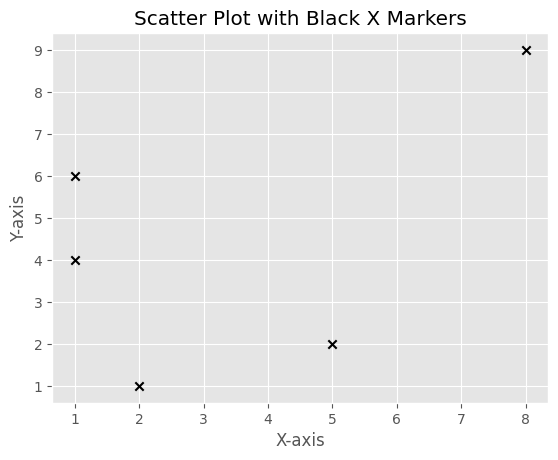

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

df = pd.DataFrame({"xs":[1,5,2,8,1], "ys":[4,2,1,9,6]})

plt.scatter(df["xs"], df["ys"], marker="x", color="black")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Scatter Plot with Black X Markers")

plt.show()

**57.** Columns in your DataFrame can also be used to modify colors and sizes.  Bill has been keeping track of his performance at work over time, as well as how good he was feeling that day, and whether he had a cup of coffee in the morning.  Make a plot which incorporates all four features of this DataFrame.

(Hint:  If you're having trouble seeing the plot, try multiplying the Series which you choose to represent size by 10 or more)

*The chart doesn't have to be pretty: this isn't a course in data viz!*

```
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})
```

<Axes: xlabel='hours_in', ylabel='productivity'>

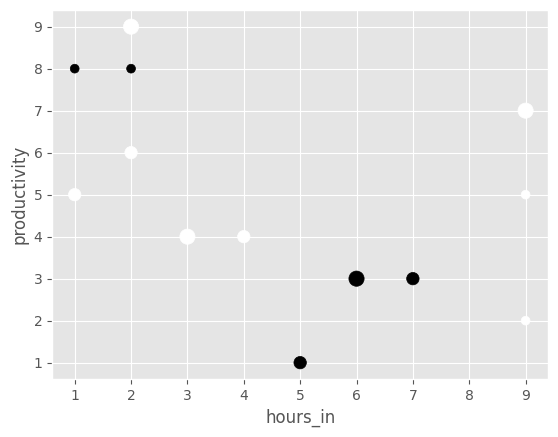

In [59]:
df = pd.DataFrame({"productivity":[5,2,3,1,4,5,6,7,8,3,4,8,9],
                   "hours_in"    :[1,9,6,5,3,9,2,9,1,7,4,2,2],
                   "happiness"   :[2,1,3,2,3,1,2,3,1,2,2,1,3],
                   "caffienated" :[0,0,1,1,0,0,0,0,1,1,0,1,0]})

df.plot.scatter("hours_in", "productivity", s = df.happiness * 40, c = df.caffienated)

**58.**  What if we want to plot multiple things?  Pandas allows you to pass in a matplotlib *Axis* object for plots, and plots will also return an Axis object.

Make a bar plot of monthly revenue with a line plot of monthly advertising spending (numbers in millions)

```
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })
```

<Axes: >

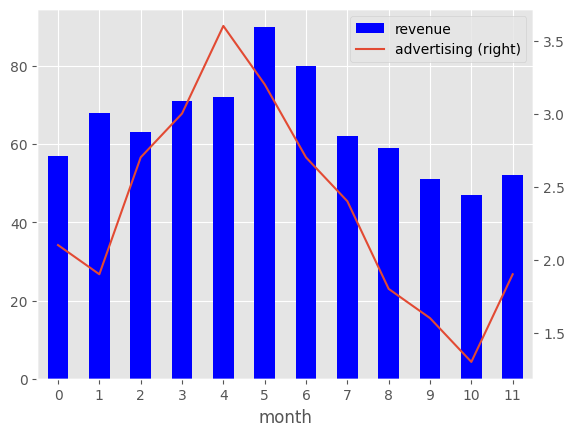

In [60]:
df = pd.DataFrame({"revenue":[57,68,63,71,72,90,80,62,59,51,47,52],
                   "advertising":[2.1,1.9,2.7,3.0,3.6,3.2,2.7,2.4,1.8,1.6,1.3,1.9],
                   "month":range(12)
                  })

axis = df.plot.bar("month", "revenue", color = "blue")
df.plot.line("month", "advertising", secondary_y = True, ax=axis)

Now we're finally ready to create a candlestick chart, which is a very common tool used to analyze stock price data.  A candlestick chart shows the opening, closing, highest, and lowest price for a stock during a time window.  The color of the "candle" (the thick part of the bar) is green if the stock closed above its opening price, or red if below.

![Candlestick Example](img/candle.jpg)

This was initially designed to be a pandas plotting challenge, but it just so happens that this type of plot is just not feasible using pandas' methods.  If you are unfamiliar with matplotlib, we have provided a function that will plot the chart for you so long as you can use pandas to get the data into the correct format.

Your first step should be to get the data in the correct format using pandas' time-series grouping function.  We would like each candle to represent an hour's worth of data.  You can write your own aggregation function which returns the open/high/low/close, but pandas has a built-in which also does this.

The below cell contains helper functions.  Call ```day_stock_data()``` to generate a DataFrame containing the prices a hypothetical stock sold for, and the time the sale occurred.  Call ```plot_candlestick(df)``` on your properly aggregated and formatted stock data to print the candlestick chart.

In [69]:
import numpy as np
def float_to_time(x):
    return str(int(x)) + ":" + str(int(x%1 * 60)).zfill(2) + ":" + str(int(x*60 % 1 * 60)).zfill(2)

def day_stock_data():
    #NYSE is open from 9:30 to 4:00
    time = 9.5
    price = 100
    results = [(float_to_time(time), price)]
    while time < 16:
        elapsed = np.random.exponential(.001)
        time += elapsed
        if time > 16:
            break
        price_diff = np.random.uniform(.999, 1.001)
        price *= price_diff
        results.append((float_to_time(time), price))
    
    
    df = pd.DataFrame(results, columns = ['time','price'])
    df.time = pd.to_datetime(df.time)
    return df

#Don't read me unless you get stuck!
def plot_candlestick(agg):
    """
    agg is a DataFrame which has a DatetimeIndex and five columns: ["open","high","low","close","color"]
    """
    fig, ax = plt.subplots()
    for time in agg.index:
        ax.plot([time.hour] * 2, agg.loc[time, ["high","low"]].values, color = "black")
        ax.plot([time.hour] * 2, agg.loc[time, ["open","close"]].values, color = agg.loc[time, "color"], linewidth = 10)

    ax.set_xlim((8,16))
    ax.set_ylabel("Price")
    ax.set_xlabel("Hour")
    ax.set_title("OHLC of Stock Value During Trading Day")
    plt.show()

**59.** Generate a day's worth of random stock data, and aggregate / reformat it so that it has hourly summaries of the opening, highest, lowest, and closing prices

In [75]:
df = day_stock_data()
df.head()
df.set_index("time", inplace = True)
agg = df.resample("H").ohlc()
agg.columns = agg.columns.droplevel()
agg["color"] = np.where(agg['close'] > agg['open'], "green", "red")
agg.head()

/tmp/ipykernel_8246/990691206.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df.time = pd.to_datetime(df.time)


,open,high,low,close,color
time,,,,,
2023-08-31 09:00:00,100.000000,100.303039,97.944030,98.212078,red
2023-08-31 10:00:00,98.219858,99.028378,97.317200,97.385514,red
2023-08-31 11:00:00,97.338926,97.521287,95.458901,95.480128,red
2023-08-31 12:00:00,95.445856,97.608927,94.631183,97.608927,green
2023-08-31 13:00:00,97.549399,100.578005,97.519246,100.162485,green


**60.** Now that you have your properly-formatted data, try to plot it yourself as a candlestick chart.  Use the ```plot_candlestick(df)``` function above, or matplotlib's [```plot``` documentation](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.plot.html) if you get stuck.

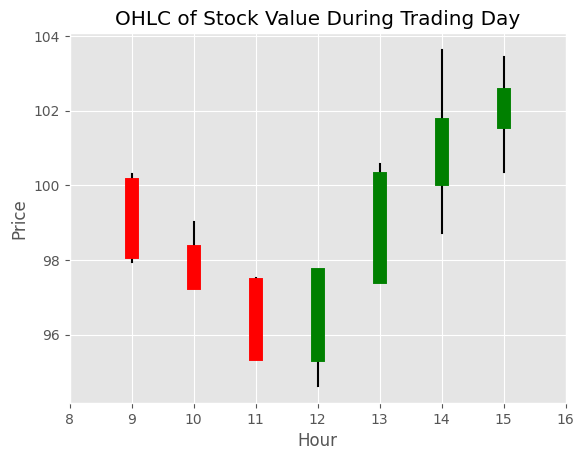

In [76]:
plot_candlestick(agg)

*More exercises to follow soon...*